In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# read data from csv file
df = pd.read_csv('./fruit2class.csv')

# df.head(8)
df.sample(7)
df.sample(6, random_state=1)

,m,d,target
3,6.6,3.2,0
7,7.0,4.8,1
6,8.2,4.4,1
2,6.5,5.5,0
10,8.9,5.2,0
4,6.9,5.9,0


In [28]:
# acess column target
df.target.unique()

array([0, 1])

<Axes: xlabel='m', ylabel='d'>

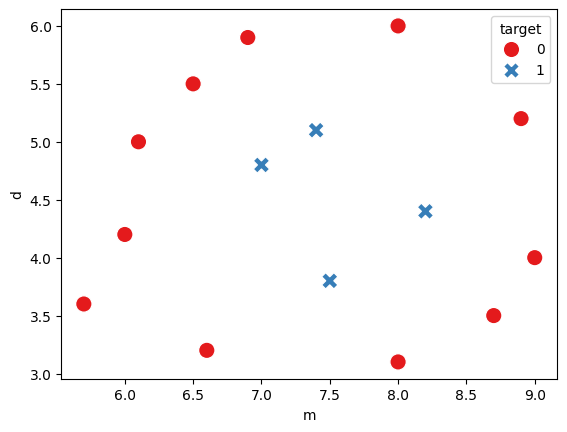

In [35]:
sns.scatterplot(x='m', y='d', hue='target', data=df, style='target', palette='Set1', s=140)

In [40]:
X = df.drop('target', axis=1)
y = df.target

,m,d
0,6.0,4.2
1,5.7,3.6
2,6.5,5.5
3,6.6,3.2
4,6.9,5.9
5,8.0,3.1
6,8.2,4.4
7,7.0,4.8
8,7.5,3.8
9,7.4,5.1


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X)
y_train = y.values

In [96]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=8, max_iter=3000, random_state=1)
model.fit(X_train, y_train)

print('Accuracy:', model.score(X_train, y_train))
print('Loss:', model.loss_)
print('Number of iterations:', model.n_iter_)
print('Number of layers:', model.n_layers_)
print("Predict:", model.predict(X_train))
print("Actual:", y_train)
print(X_train.shape)

Accuracy: 1.0
Loss: 0.08295360804331145
Number of iterations: 2214
Number of layers: 3
Predict: [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
Actual: [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
(15, 2)


<Axes: title={'center': 'MLP on fruit dataset 2 classes (hidden:100)'}, xlabel='m (grames)', ylabel='d (diameter)'>

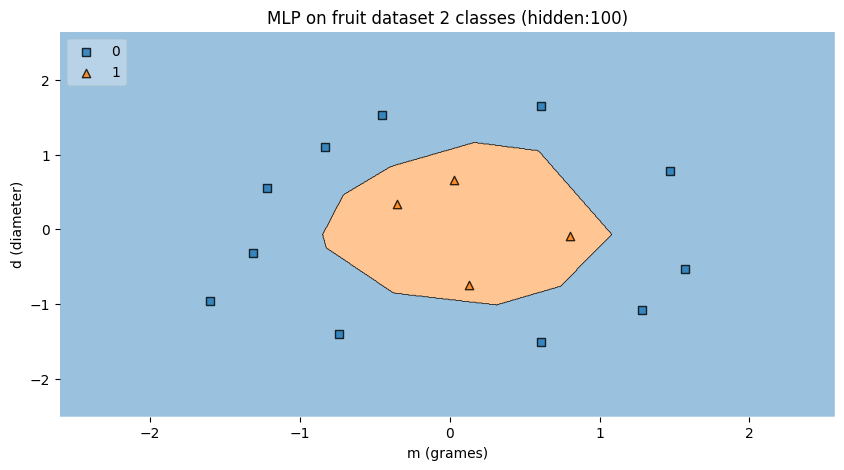

In [97]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10, 5))
plt.ylabel('d (diameter)')
plt.xlabel('m (grames)')
plt.title('MLP on fruit dataset 2 classes (hidden:100)')
plot_decision_regions(X_train, y_train, model, legend=2)

In [83]:
[coef.shape for coef in model.coefs_]

[(2, 100), (100, 1)]

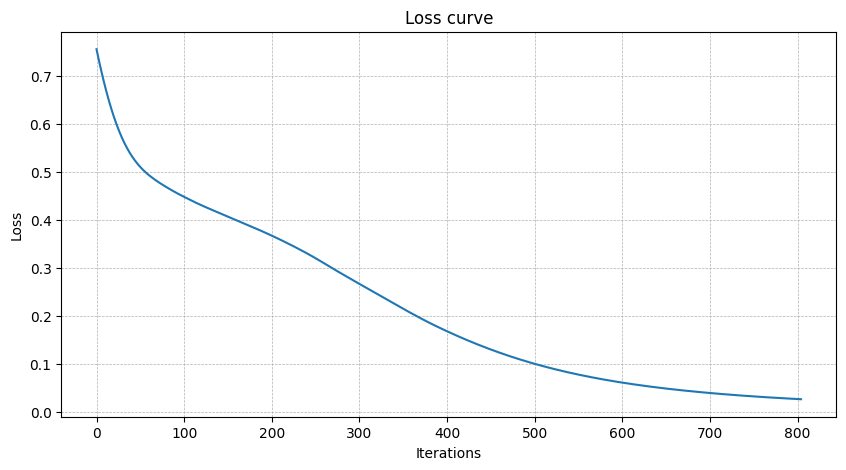

In [88]:
plt.figure(figsize=(10, 5))
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title("Loss curve")
plt.grid(True, linestyle='--', linewidth=0.5, )
plt.plot(model.loss_curve_)